In [1]:
import geopandas as gpd

In [2]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

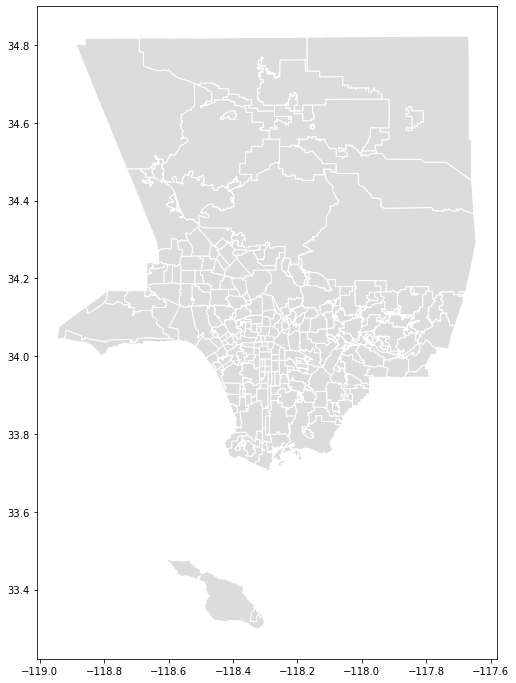

In [3]:
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [5]:
parks = gpd.read_file('https://opendata.arcgis.com/datasets/138bf27d90f94293b19ffe35f4f5f076_5.geojson')

In [6]:
parks.head ()

,OBJECTID,Area_Acres,Park_ID,CD_Real,Address,Region,Name,Park_Class,CD_NEW,TOOLTIP,ACRES,geometry
0,1,8.433364,512,03,23751 Ingomar St,V,Lazy J Ranch Park,N,12,Name: Lazy J Ranch Park\nLocation: 23751 Ingom...,8.4333635,"POLYGON ((-118.64451 34.21238, -118.64451 34.2..."
1,2,1.387374,883,15,Adjacent to Angels Gate Park at 3400 Gaffey St...,P,Lookout Point Park,N,15,Name: Lookout Point Park\nLocation: Adjacent t...,1.38737377,"POLYGON ((-118.29192 33.71197, -118.29192 33.7..."
2,3,3.173861,320,15,1464 E 109th Street,P,109th Street Recreation Center,N,15,Name: 109th Street Recreation Center\nLocation...,3.17386107,"POLYGON ((-118.24925 33.93590, -118.24917 33.9..."
3,4,0.154871,366,08,4726 8th Avenue,P,Angeles Mesa Park,N,8,Name: Angeles Mesa Park\nLocation: 4726 8th Av...,0.1548711,"POLYGON ((-118.32523 34.00014, -118.32523 34.0..."
4,5,0.960725,213,09,4800 S. Hoover St,P,Julian C. Dixon Park,N,9,Name: Julian C. Dixon Park\nLocation: 4800 S. ...,0.96072542,"POLYGON ((-118.28680 33.99881, -118.28664 33.9..."


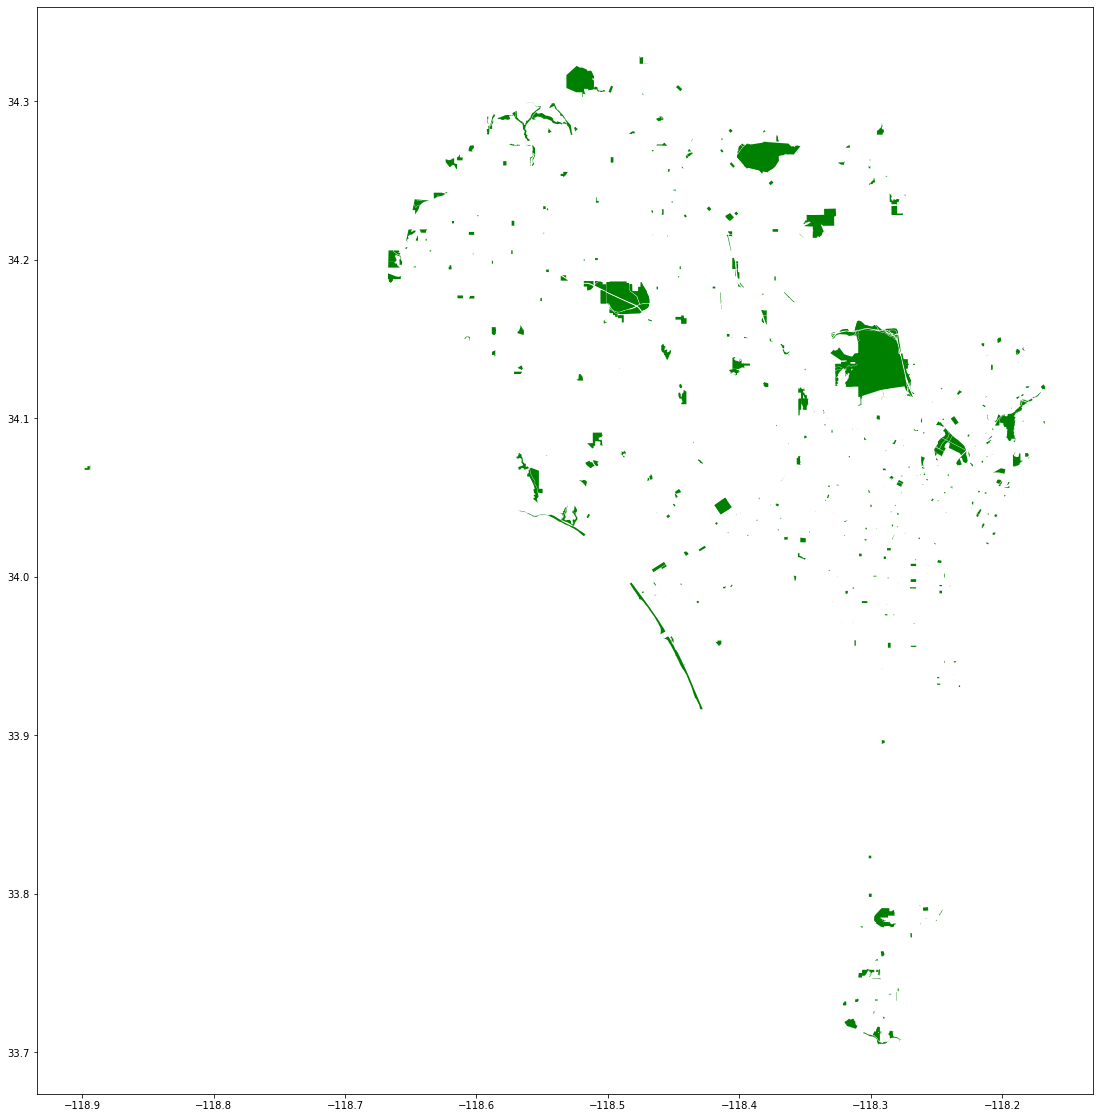

In [7]:
parks.plot(figsize=(20,20),color='green')

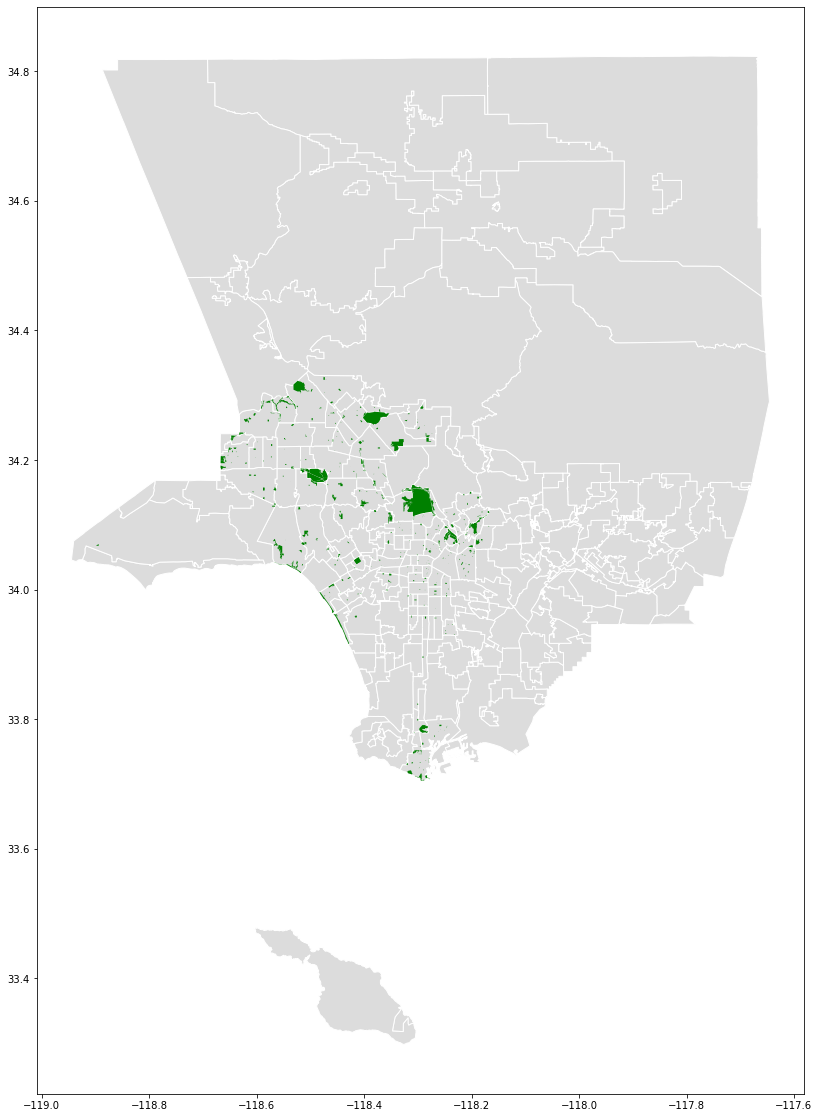

In [8]:
base = neighborhoods.plot(figsize=(20,20),color='gainsboro', edgecolor='white')
ax = parks.plot(ax=base, color='green', markersize=5)

In [1]:
#We need to remove a number of neighborhoods not in the city of LA

In [90]:
neighborhoods = neighborhoods[neighborhoods.name != 'Unincorporated Santa Monica Mountains']
neighborhoods = neighborhoods[neighborhoods.name != 'Unincorporated Santa Susana Mountains']
neighborhoods = neighborhoods[neighborhoods.name != 'Santa Monica']
neighborhoods = neighborhoods[neighborhoods.name != 'Rancho Palos Verdes']
neighborhoods = neighborhoods[neighborhoods.name != 'Santa Monica']
neighborhoods = neighborhoods[neighborhoods.name != 'Glendale']
neighborhoods = neighborhoods[neighborhoods.name != 'West Hollywood']
neighborhoods = neighborhoods[neighborhoods.name != 'El Segundo']
neighborhoods = neighborhoods[neighborhoods.name != 'Inglewood']
neighborhoods = neighborhoods[neighborhoods.name != 'Topanga']
neighborhoods = neighborhoods[neighborhoods.name != 'Beverly Hills']
neighborhoods = neighborhoods[neighborhoods.name != 'South Pasadena']

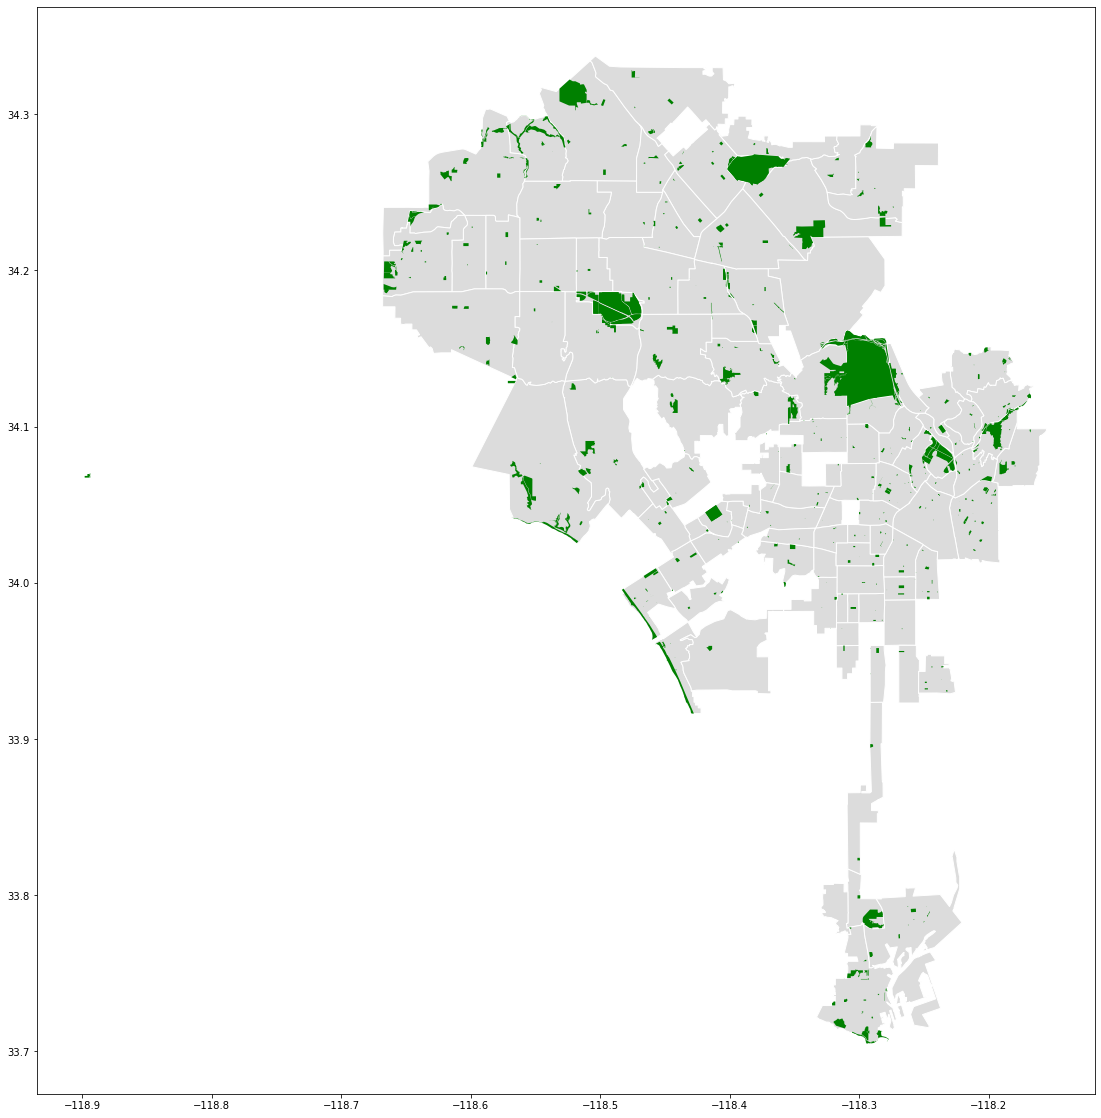

In [91]:
base = neighborhoods.plot(figsize=(20,20),color='gainsboro', edgecolor='white')
ax = parks.plot(ax=base, color='green', markersize=5)

In [92]:
parks.geometry.total_bounds

array([-118.89828982,   33.70490648, -118.16732429,   34.32845338])

In [93]:
minx, miny, maxx, maxy = parks.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.89828981518296
-118.16732429323247
33.704906480750786
34.32845337724693


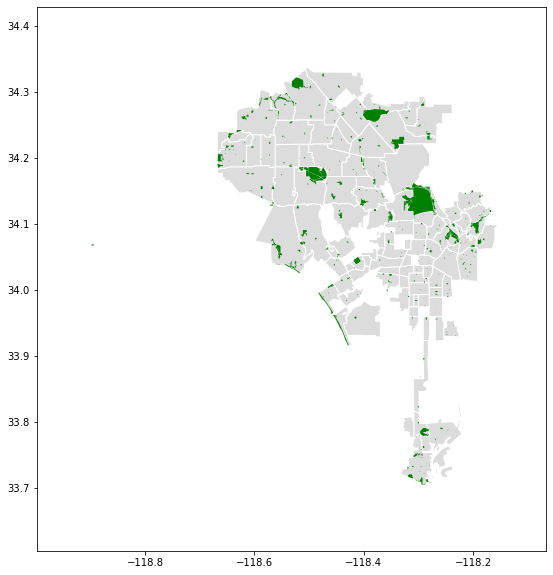

In [94]:
base = neighborhoods.plot(figsize=(10,10),color='gainsboro', edgecolor='white')
ax = parks.plot(ax=base, marker='o', color='green', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

In [95]:
parks.set_crs(epsg=4326, inplace=True)
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [97]:
join = gpd.sjoin(neighborhoods,
                 parks,
                 how='right')

In [98]:
join.head ()

,index_left,kind,external_id,name,slug,set,metadata,resource_uri,acres_x,acres_y,...,Park_ID,CD_Real,Address,Region,Name,Park_Class,CD_NEW,TOOLTIP,ACRES,geometry
197,0.0,L.A. County Neighborhood (V5),adams-normandie,Adams-Normandie,adams-normandie-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 0.805350187789, 'type': 'segment-of-a...",/1.0/boundary/adams-normandie-la-county-neighb...,2.0,2.0,...,380,08,2700 S Budlong Avenue,P,Elinor and Don Richardson Family Park,N,8,Name: Elinor and Don Richardson Family Park\nL...,0.32141074,"POLYGON ((-118.29564 34.03003, -118.29548 34.0..."
146,0.0,L.A. County Neighborhood (V5),adams-normandie,Adams-Normandie,adams-normandie-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 0.805350187789, 'type': 'segment-of-a...",/1.0/boundary/adams-normandie-la-county-neighb...,2.0,2.0,...,378,08,2717 Halldale Avenue,P,Loren Miller Recreation Center,N,8,Name: Loren Miller Recreation Center\nLocation...,2.41578742,"POLYGON ((-118.30292 34.02998, -118.30292 34.0..."
26,1.0,L.A. County Neighborhood (V5),arleta,Arleta,arleta-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.09617917557, 'type': 'segment-of-a-...",/1.0/boundary/arleta-la-county-neighborhood-v5/,2.0,2.0,...,801,06,13310 Branford St,V,Branford Park,C,6,Name: Branford Park\nLocation: 13310 Branford St,13.37632046,"POLYGON ((-118.42130 34.23176, -118.42134 34.2..."
65,1.0,L.A. County Neighborhood (V5),arleta,Arleta,arleta-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.09617917557, 'type': 'segment-of-a-...",/1.0/boundary/arleta-la-county-neighborhood-v5/,2.0,2.0,...,553,06,14215 Devonshire Ave,V,Devonshire Arleta Park,N,6,Name: Devonshire Arleta Park\nLocation: 14215 ...,1.8226343,"POLYGON ((-118.44268 34.25764, -118.44258 34.2..."
429,2.0,L.A. County Neighborhood (V5),arlington-heights,Arlington Heights,arlington-heights-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 1.03141523527, 'type': 'segment-of-a-...",/1.0/boundary/arlington-heights-la-county-neig...,1.0,1.0,...,300,10,4103 W. Washington Blvd.,M,Washington Irving Pocket Park,N,10,Name: Washington Irving Pocket Park\nLocation:...,0.12643795,"POLYGON ((-118.32875 34.04002, -118.32857 34.0..."


In [99]:
park_size_by_neighborhood = join.name.value_counts().rename_axis('name').reset_index(name='acres')

In [100]:
park_size_by_neighborhood. head (20)

,name,acres
0,San Pedro,21
1,Boyle Heights,18
2,Venice,16
3,West Hills,14
4,Griffith Park,13
5,Chatsworth,13
6,Highland Park,12
7,Pacific Palisades,12
8,Porter Ranch,11
9,Encino,11


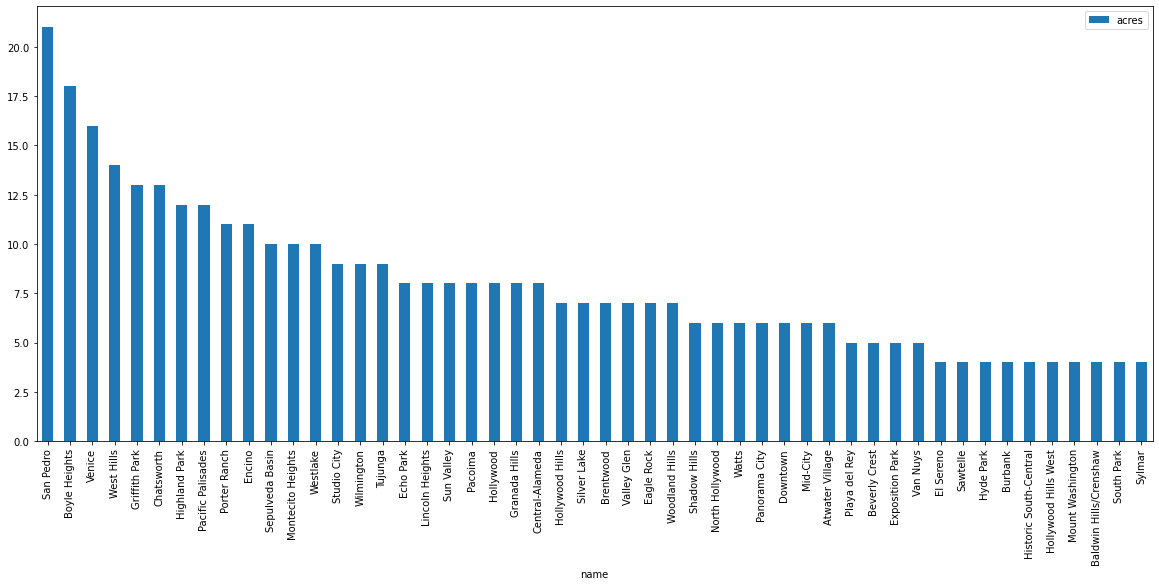

In [101]:
park_size_by_neighborhood[:50].plot.bar(figsize=(20,8),x='name',y='acres')

In [104]:
neighborhoods=neighborhoods.merge(park_size_by_neighborhood,on='name')

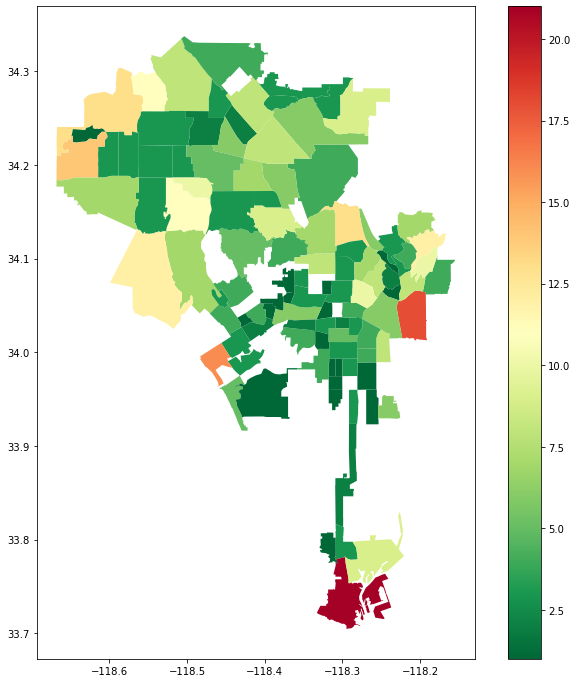

In [105]:
neighborhoods.plot(figsize=(12,12),column='acres',legend=True,cmap='RdYlGn_r')

In [106]:
import contextily as ctx

In [107]:
neighborhoods = neighborhoods.to_crs(epsg=3857)

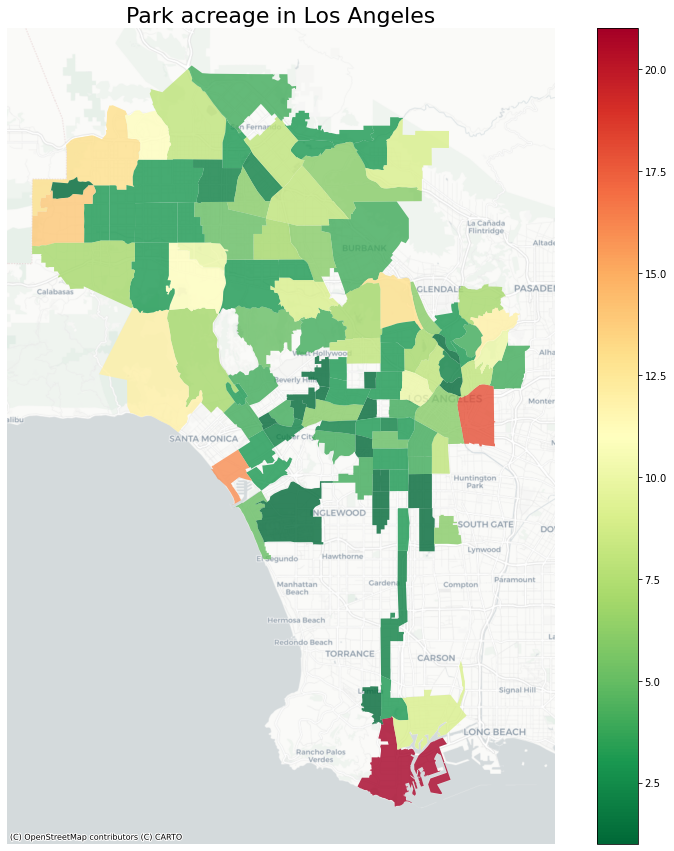

In [108]:
ax = neighborhoods.plot(figsize=(15,15),
                        column='acres',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Park acreage in Los Angeles',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [109]:
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [110]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [111]:
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [112]:
center_lat=(maxy-miny)/2+miny
center_lat

34.020922350091055

In [113]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.41173300000008

In [114]:
fig = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='acres',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [115]:
fig.write_html("laparkacerage.html")